### Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import os
import glob
import h5py
from scipy.io import matlab

### Data of input image and output density count

In [5]:
part_A_train = os.path.join(os.getcwd(),'ShanghaiTech\\part_A\\train_data\\images')
part_A_test = os.path.join(os.getcwd(),'ShanghaiTech\\part_A\\test_data\\images')
part_B_train = os.path.join(os.getcwd(),'ShanghaiTech\\part_B\\train_data\\images')
part_B_test = os.path.join(os.getcwd(),'ShanghaiTech\\part_B\\test_data\\images')

In [6]:
part_A_train_images = glob.glob(os.path.join(part_A_train,'*.jpg'))
len(part_A_train_images)

300

In [7]:
part_A_train_images = glob.glob(os.path.join(part_A_train,'*.jpg'))
part_A_test_images = glob.glob(os.path.join(part_A_test,'*.jpg'))
part_B_train_images = glob.glob(os.path.join(part_B_train,'*.jpg'))
part_B_test_images = glob.glob(os.path.join(part_B_test,'*.jpg'))
print(f'Shanghai Part A train -- total size {len(part_A_train_images)}')
print(f'Shanghai Part A test -- total size {len(part_A_test_images)}')
print(f'Shanghai Part B train -- total size {len(part_B_train_images)}')
print(f'Shanghai Part B test -- total size {len(part_B_test_images)}')
print(f'Total people counting images = {len(part_A_train_images)+len(part_A_test_images)+len(part_B_train_images)+len(part_B_test_images)}')

Shanghai Part A train -- total size 300
Shanghai Part A test -- total size 182
Shanghai Part B train -- total size 400
Shanghai Part B test -- total size 316
Total people counting images = 1198


In [60]:
def image_in_count(list_of_paths,list_names):
    
    writer = pd.ExcelWriter('Shanghai Dataset Count.xlsx',engine='xlsxwriter')
    
    for index,(path,names) in enumerate(zip(list_of_paths,list_names),1):
        
        images_data = {'Sno':[],
                       'Image_Name': [],
                     'Width':[],
                     'Height':[],
                     'Channel_Name':[],
                      'No_of_People':[],
                     'Density_Count':[]}
        
        def extract_number(path):
            """Extracts the number from the image filename."""
            filename = path.split('\\')[-1]
            return int(filename.split('_')[1].split('.')[0])
    
        image_paths = sorted(path,key=extract_number)

        Sno = 1
        
        for image_path in image_paths:
            try:
                image_name = os.path.splitext(os.path.basename(image_path))[0]
                image_array = plt.imread(image_path)
                output_file = image_path.replace('jpg','h5').replace('images','ground-truth-h5')
                output_image_file = h5py.File(output_file,'r')
                ground_truth = np.asarray(output_image_file['density'])
                count_of_people = int(np.sum(ground_truth))
                density_count = np.sum(ground_truth)
                

                if len(image_array.shape) == 3:
                    height, width, channels = image_array.shape
                    channel_name = 'RGB'
                else:
                    height, width = image_array.shape
                    channels = 1
                    channel_name = 'Gray'

                images_data['Sno'].append(Sno)  # Add sno value
                Sno += 1  # Increment sno counter
                images_data['Height'].append(height)
                images_data['Width'].append(width)
                images_data['Channel_Name'].append(channel_name)
                images_data['Image_Name'].append(image_name)
                images_data['No_of_People'].append(count_of_people)
                images_data['Density_Count'].append(density_count)

            except Exception as e:
                print(f"Error processing image: {image_path}, Exception: {e}")

        dataframe = pd.DataFrame(images_data)
        dataframe.to_excel(writer, sheet_name=f'{names}', index=False)

    writer.close()  # Save the Excel file

In [61]:
list_names = ["part_A_train_images","part_A_test_images","part_B_train_images","part_B_test_images"]
list_of_images_path = [part_A_train_images,part_A_test_images,part_B_train_images,part_B_test_images]

In [62]:
image_in_count(list_of_images_path,list_names)

In [63]:
def display_output_image(path):
    
    original_image = plt.imread(path)
    path_replace = path.replace('jpg','h5').replace('images','ground-truth-h5')
    image = h5py.File(path_replace,'r')
    ground_truth = np.asarray(image['density'])
    
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    
    axes[0].imshow(original_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    

    axes[1].imshow(ground_truth,cmap='jet')
    axes[1].set_title('Ground_truth')
    axes[1].axis('off')
 
    plt.show()
    
    return np.sum(ground_truth)

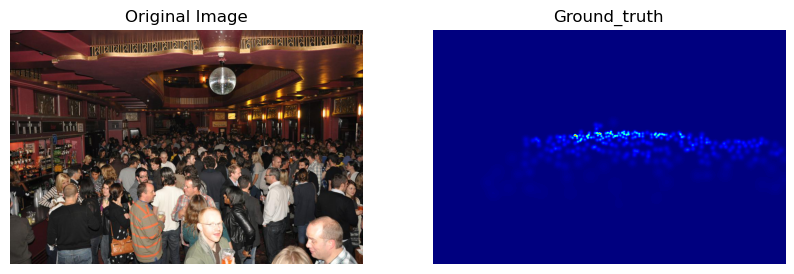

241.52519

In [64]:
display_output_image(part_A_test_images[100])